In [96]:
#1、读取训练集(保险行业问询对话集),最原始的方法读取
def getfilestring(traintxtpath):
    trainsets=[]
    with open(traintxtpath,'r',encoding='utf-8') as file:
        for line in file:
            trainsets.append(line.split('++$++')[2].strip())
    return ''.join(trainsets)

In [103]:
#测试训练集
traintxtpath='F:/ai/1/nlp/train.txt'
df=getfilestring(traintxtpath)
df=df.replace('？','')
df=df.replace('吗','')

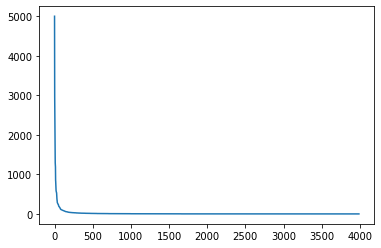

In [167]:
#分词
from collections import Counter
import jieba
words_count=Counter(list(jieba.cut(df)))
words_count.most_common()
def getwords_count(word):
    if word in words_count:
        return words_count[word]
    else:
        return 1
words_count_f=[f for w,f in words_count.most_common()]
words_count_w=[w for w,f in words_count.most_common()]
#print(words_count_f[:10])
import matplotlib.pyplot as plot
plot.plot(words_count_f)
#print(seg_list)
#Counter(df)

In [180]:
getwords_count('保险')

5002

In [154]:
words_count_w[:10]

['保险', '的', '人寿保险', '什么', '是', '我', '是否', '可以', '健康', '如何']

In [155]:
def gettwo_gram_word(words_count_w):
    two_gram=[]
    for i in range(len(words_count_w)-1):
        two_gram.append(words_count_w[i]+words_count_w[i+1])
    return two_gram

In [156]:
#test two_gram_word()
two_gram_word_gen=gettwo_gram_word(words_count_w)

In [203]:
two_gram_count=Counter(two_gram_word_gen)
print(two_gram_count.most_common()[:10])
def gettwogram_count(word):
    print('gettwogram_count',word)
    if word in two_gram_count:
        return two_gram_count[word]
    else:
        return 0

[('保险的', 1), ('的人寿保险', 1), ('人寿保险什么', 1), ('什么是', 1), ('是我', 1), ('我是否', 1), ('是否可以', 1), ('可以健康', 1), ('健康如何', 1), ('如何医疗保险', 1)]


In [212]:
#生成2-gram模型
def two_grm_model(test):
    tokens=list(jieba.cut(test))
    print(tokens)
    probability=1
    for i in range(len(tokens)-1):
        print(i)
        word=tokens[i]
        print('word:',word)
        next_word=tokens[i+1]
        print('next word:',next_word)
        print('word+next_word:'+word+next_word)
        print('gettwo_gram_word',gettwogram_count(word+next_word))
        print('getwords_count',getwords_count(word))
        prob=gettwogram_count(word+next_word)/getwords_count(word)
        probability*=prob
    return probability

In [220]:
##test two_grm_model
two_grm_model('汽等等')

['汽', '等等']
0
word: 汽
next word: 等等
word+next_word:汽等等
gettwogram_count 汽等等
gettwo_gram_word 0
getwords_count 1
gettwogram_count 汽等等


0.0